## Importing Libraries and CSV File

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('life_expectancy.csv')

## Data Cleaning

Cleaning column names

In [4]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.title()

In [5]:
df.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Feature Engineering

Obtaining info of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life Expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant Deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage Expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  Bmi                              2904 non-null   float64
 11  Under-Five Deaths                2938 non-null   int64  
 12  Polio               

In [7]:
len(df.columns)

22

### Finding the Correlation

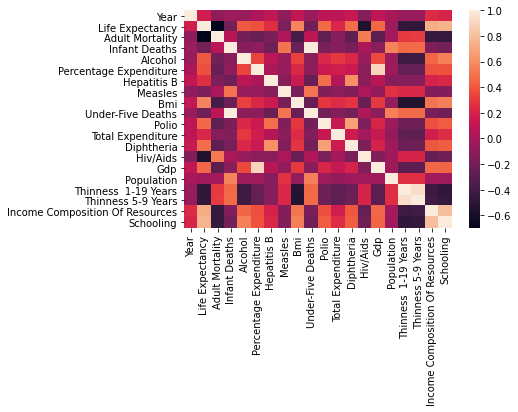

In [8]:
sns.heatmap(df.corr());

Correlation of features relative to life expectancy

In [9]:
df.corr()['Life Expectancy'].sort_values()

Adult Mortality                   -0.696359
Hiv/Aids                          -0.556556
Thinness  1-19 Years              -0.477183
Thinness 5-9 Years                -0.471584
Under-Five Deaths                 -0.222529
Infant Deaths                     -0.196557
Measles                           -0.157586
Population                        -0.021538
Year                               0.170033
Total Expenditure                  0.218086
Hepatitis B                        0.256762
Percentage Expenditure             0.381864
Alcohol                            0.404877
Gdp                                0.461455
Polio                              0.465556
Diphtheria                         0.479495
Bmi                                0.567694
Income Composition Of Resources    0.724776
Schooling                          0.751975
Life Expectancy                    1.000000
Name: Life Expectancy, dtype: float64

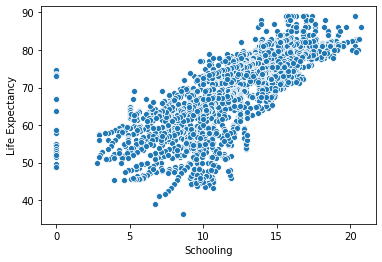

In [10]:
sns.scatterplot(data=df, x='Schooling', y='Life Expectancy');

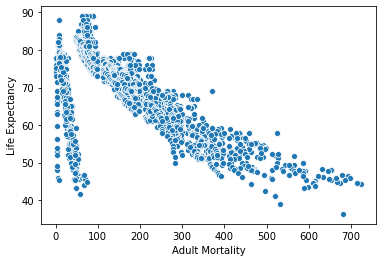

In [11]:
sns.scatterplot(data=df, x='Adult Mortality', y='Life Expectancy');

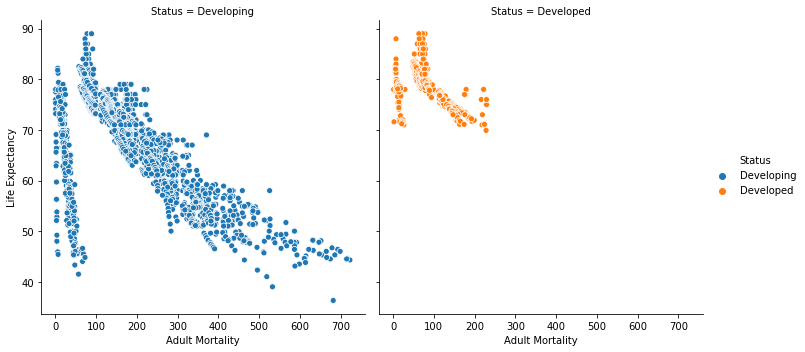

In [12]:
sns.relplot(x="Adult Mortality", y="Life Expectancy", hue="Status", col="Status", data=df);

### Finding %s of Nan in Each Column

Calculating the percentages of null values in each column

In [13]:
def nan_percentage(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [14]:
missing_data = nan_percentage(df)

In [15]:
missing_data

Life Expectancy                     0.340368
Adult Mortality                     0.340368
Polio                               0.646698
Diphtheria                          0.646698
Bmi                                 1.157250
Thinness  1-19 Years                1.157250
Thinness 5-9 Years                  1.157250
Schooling                           5.547992
Income Composition Of Resources     5.684139
Alcohol                             6.603131
Total Expenditure                   7.692308
Gdp                                15.248468
Hepatitis B                        18.822328
Population                         22.191967
dtype: float64

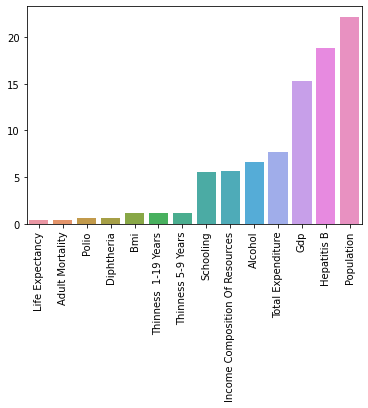

In [16]:
sns.barplot(x=missing_data.index,y=missing_data)
plt.xticks(rotation=90);

### Drop Feature Columns

Selecting features needed for the linear regression model

In [17]:
df = df[['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure',
       'Measles', 'Bmi', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'Hiv/Aids', 'Thinness  1-19 Years',
       'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling']]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life Expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant Deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage Expenditure           2938 non-null   float64
 8   Measles                          2938 non-null   int64  
 9   Bmi                              2904 non-null   float64
 10  Under-Five Deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total Expenditure   

### Removing Rows With Nan in the Life Expectancy Column

In [19]:
df[df['Life Expectancy'].isnull()]

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Measles,Bmi,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,Hiv/Aids,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,0,82.8,0,98.0,3.58,98.0,0.1,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,0,58.4,0,96.0,5.58,96.0,0.1,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,0,81.6,0,79.0,17.24,79.0,0.1,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,0,NaN,0,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,0,87.3,0,87.0,4.65,87.0,0.1,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,0,77.3,0,99.0,7.20,99.0,0.1,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,0,83.3,0,99.0,9.27,99.0,0.1,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,0,5.2,0,96.0,6.14,96.0,0.1,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,0,NaN,0,69.0,6.50,69.0,0.1,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,0,79.3,0,9.0,16.61,9.0,0.1,0.2,0.1,NaN,0.0


In [20]:
df = df.dropna(subset=['Life Expectancy'])

In [21]:
missing_data_one = nan_percentage(df)
missing_data_one

Polio                              0.648907
Diphtheria                         0.648907
Bmi                                1.092896
Thinness  1-19 Years               1.092896
Thinness 5-9 Years                 1.092896
Income Composition Of Resources    5.464481
Schooling                          5.464481
Alcohol                            6.591530
Total Expenditure                  7.718579
dtype: float64

### Removing Rows With Nan in Certain Features

In [22]:
ivory_coast = df[df['Country'] == "Côte d'Ivoire"]
ivory_coast.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Measles,Bmi,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,Hiv/Aids,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,NaN,0.0,65,28.0,79,81.0,NaN,83.0,1.9,5.5,5.5,NaN,NaN
433,Côte d'Ivoire,2014,Developing,52.8,47.0,58,0.01,0.0,50,27.4,80,76.0,5.72,76.0,2.0,5.6,5.6,NaN,NaN
434,Côte d'Ivoire,2013,Developing,52.3,412.0,59,3.15,0.0,48,26.8,81,79.0,5.81,8.0,2.4,5.8,5.7,NaN,NaN
435,Côte d'Ivoire,2012,Developing,52.0,415.0,59,3.24,0.0,137,26.2,82,83.0,6.14,82.0,2.9,5.9,5.9,NaN,NaN
436,Côte d'Ivoire,2011,Developing,51.7,419.0,60,3.13,0.0,628,25.6,83,58.0,6.42,62.0,3.3,6.1,6.0,NaN,NaN


I realised that Côte d'Ivoire has missing data for income composition of resources and schooling. Looking though the dataset thoroughly, I found out that countries like South Sudan and Czechia has no data for income composition of resources and schooling (or for other features). I have decided to drop 12 countries with a high number of incomplete data from the datasets.

In [23]:
df = df[df['Country'] != "Côte d'Ivoire"]
df = df[df['Country'] != "South Sudan"]
df = df[df['Country'] != "Czechia"]
df = df[df['Country'] != "Democratic People's Republic of Korea"]
df = df[df['Country'] != "Democratic Republic of the Congo"]
df = df[df['Country'] != "Republic of Korea"]
df = df[df['Country'] != "Republic of Moldova"]
df = df[df['Country'] != "Somalia"]
df = df[df['Country'] != "Sudan"]
df = df[df['Country'] != "United Kingdom of Great Britain and Northern Ireland"]
df = df[df['Country'] != "United Republic of Tanzania"]
df = df[df['Country'] != "United States of America"]

In [24]:
len(df)

2736

nan_polio is the mean of the Polio data of each country (excluding null values).

In [25]:
nan_polio = df[~df['Polio'].isnull()][['Country', 'Polio']]
nan_polio = nan_polio.groupby(by='Country').mean()
nan_polio.head()

,Polio
Country,
Afghanistan,48.3750
Albania,98.1250
Algeria,91.7500
Angola,46.1250
Antigua and Barbuda,96.9375


The following dataframes groupby the mean of each feature by country (excluding null values). For example: nan_bmi groupbys the mean of Bmi by country.

In [26]:
nan_diphtheria = df[~df['Diphtheria'].isnull()][['Country', 'Diphtheria']]
nan_diphtheria = nan_diphtheria.groupby(by='Country').mean()

nan_bmi = df[~df['Bmi'].isnull()][['Country', 'Bmi']]
nan_bmi = nan_bmi.groupby(by='Country').mean()

nan_income = df[~df['Income Composition Of Resources'].isnull()][['Country', 'Income Composition Of Resources']]
nan_income = nan_income.groupby(by='Country').mean()

nan_schooling = df[~df['Schooling'].isnull()][['Country', 'Schooling']]
nan_schooling = nan_schooling.groupby(by='Country').mean()

nan_alcohol = df[~df['Alcohol'].isnull()][['Country', 'Alcohol']]
nan_alcohol = nan_alcohol.groupby(by='Country').mean()

nan_expenditure = df[~df['Total Expenditure'].isnull()][['Country', 'Total Expenditure']]
nan_expenditure = nan_expenditure.groupby(by='Country').mean()

nan_check checks which values in the dataframe are null.

In [27]:
nan_check = df.isnull()
nan_check.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Measles,Bmi,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,Hiv/Aids,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Measles', 'Bmi',
       'Under-Five Deaths', 'Polio', 'Total Expenditure', 'Diphtheria',
       'Hiv/Aids', 'Thinness  1-19 Years', 'Thinness 5-9 Years',
       'Income Composition Of Resources', 'Schooling'],
      dtype='object')

The following functions are created to fill in missing values in each feature. For example, fill_nan_polio finds null values in the Polio column of df, and fills it with the mean value in nan_polio by matching the countries together (i.e if Polio data for 2013 Canada is missing in df, fill_nan_polio will take the mean value of Canada's Polio data from nan_polio and replace the null value with it.

In [29]:
def fill_nan_polio(df):
    for i in range(0, len(df)):
        if nan_check.iloc[i, 11] == True:
            df.iloc[i, 11] = nan_polio.loc[df.iloc[i, 0], 'Polio']
            
def fill_nan_bmi(df):
    for i in range(0, len(df)):
        if nan_check.iloc[i, 9] == True:
            df.iloc[i, 9] = nan_bmi.loc[df.iloc[i, 0], 'Polio']

def fill_nan_diphtheria(df):
    for i in range(0, len(df)):
        if nan_check.iloc[i, 13] == True:
            df.iloc[i, 13] = nan_diphtheria.loc[df.iloc[i, 0], 'Diphtheria']
            
def fill_nan_income(df):
    for i in range(0, len(df)):
        if nan_check.iloc[i, 17] == True:
            df.iloc[i, 17] = nan_income.loc[df.iloc[i, 0], 'Income Composition Of Resources']
            
def fill_nan_schooling(df):
    for i in range(0, len(df)):
        if nan_check.iloc[i, 18] == True:
            df.iloc[i, 18] = nan_schooling.loc[df.iloc[i, 0], 'Schooling']
            
def fill_nan_alcohol(df):
    for i in range(0, len(df)):
        if nan_check.iloc[i, 6] == True:
            df.iloc[i, 6] = nan_alcohol.loc[df.iloc[i, 0], 'Alcohol']
            
def fill_nan_expenditure(df):
    for i in range(0, len(df)):
        if nan_check.iloc[i, 12] == True:
            df.iloc[i, 12] = nan_expenditure.loc[df.iloc[i, 0], 'Total Expenditure']

In [30]:
to_fill = df.copy()

In [31]:
fill_nan_polio(to_fill)
to_fill['Polio']

0        6.0
1       58.0
2       62.0
3       67.0
4       68.0
        ... 
2933    67.0
2934     7.0
2935    73.0
2936    76.0
2937    78.0
Name: Polio, Length: 2736, dtype: float64

In [32]:
fill_nan_diphtheria(to_fill)
to_fill['Diphtheria']

0       65.0
1       62.0
2       64.0
3       67.0
4       68.0
        ... 
2933    65.0
2934    68.0
2935    71.0
2936    75.0
2937    78.0
Name: Diphtheria, Length: 2736, dtype: float64

In [33]:
fill_nan_bmi(to_fill)
fill_nan_income(to_fill)
fill_nan_schooling(to_fill)
fill_nan_alcohol(to_fill)
fill_nan_expenditure(to_fill)

In [34]:
to_fill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2736 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2736 non-null   object 
 1   Year                             2736 non-null   int64  
 2   Status                           2736 non-null   object 
 3   Life Expectancy                  2736 non-null   float64
 4   Adult Mortality                  2736 non-null   float64
 5   Infant Deaths                    2736 non-null   int64  
 6   Alcohol                          2736 non-null   float64
 7   Percentage Expenditure           2736 non-null   float64
 8   Measles                          2736 non-null   int64  
 9   Bmi                              2736 non-null   float64
 10  Under-Five Deaths                2736 non-null   int64  
 11  Polio                            2736 non-null   float64
 12  Total Expenditure   

In [35]:
to_fill.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Measles', 'Bmi',
       'Under-Five Deaths', 'Polio', 'Total Expenditure', 'Diphtheria',
       'Hiv/Aids', 'Thinness  1-19 Years', 'Thinness 5-9 Years',
       'Income Composition Of Resources', 'Schooling'],
      dtype='object')

### Final DataFrame

In [36]:
final_df = to_fill[['Life Expectancy', 'Adult Mortality',
                    'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Measles', 'Bmi',
                    'Under-Five Deaths', 'Polio', 'Total Expenditure', 'Diphtheria',
                    'Hiv/Aids', 'Thinness  1-19 Years', 'Thinness 5-9 Years',
                    'Income Composition Of Resources', 'Schooling']]

In [37]:
final_df.head()

,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Measles,Bmi,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,Hiv/Aids,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
0,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5


## Multi-linear Regression Model

Separating data into X features and y label

In [38]:
X = final_df.drop('Life Expectancy',axis=1)
y = final_df['Life Expectancy']

Splitting X and y into a training set and test set

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

Scale X features

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Using the ElasticNet model (regularization)

In [44]:
from sklearn.linear_model import ElasticNet

In [45]:
base_elastic_model = ElasticNet()

In [46]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

Creating a GridSearchCV object and run a grid search for the best parameters for the model based on the scaled training data

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=10,
                          verbose=1)

In [49]:
grid_model.fit(scaled_X_train,y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    0.6s finished


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

Displaying the best combination of parameters for the model

In [50]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.7}

In [51]:
y_pred = grid_model.predict(scaled_X_test)

Calculating mean absolute error and root mean squared error

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [53]:
# MAE
mean_absolute_error(y_test,y_pred)

3.28692313549028

In [54]:
# RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

4.424460206230158

In [55]:
np.mean(final_df['Life Expectancy'])

69.48406432748541

Calculating R2 score

In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score(y_test,y_pred)

0.8037310357445849